In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# set the font globally
plt.rcParams.update({'font.family':'Arial'})
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2
# update the overall font size
plt.rcParams.update({'font.size':11})
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import pandas as pd

# Load the dataset
file_path = 'data/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


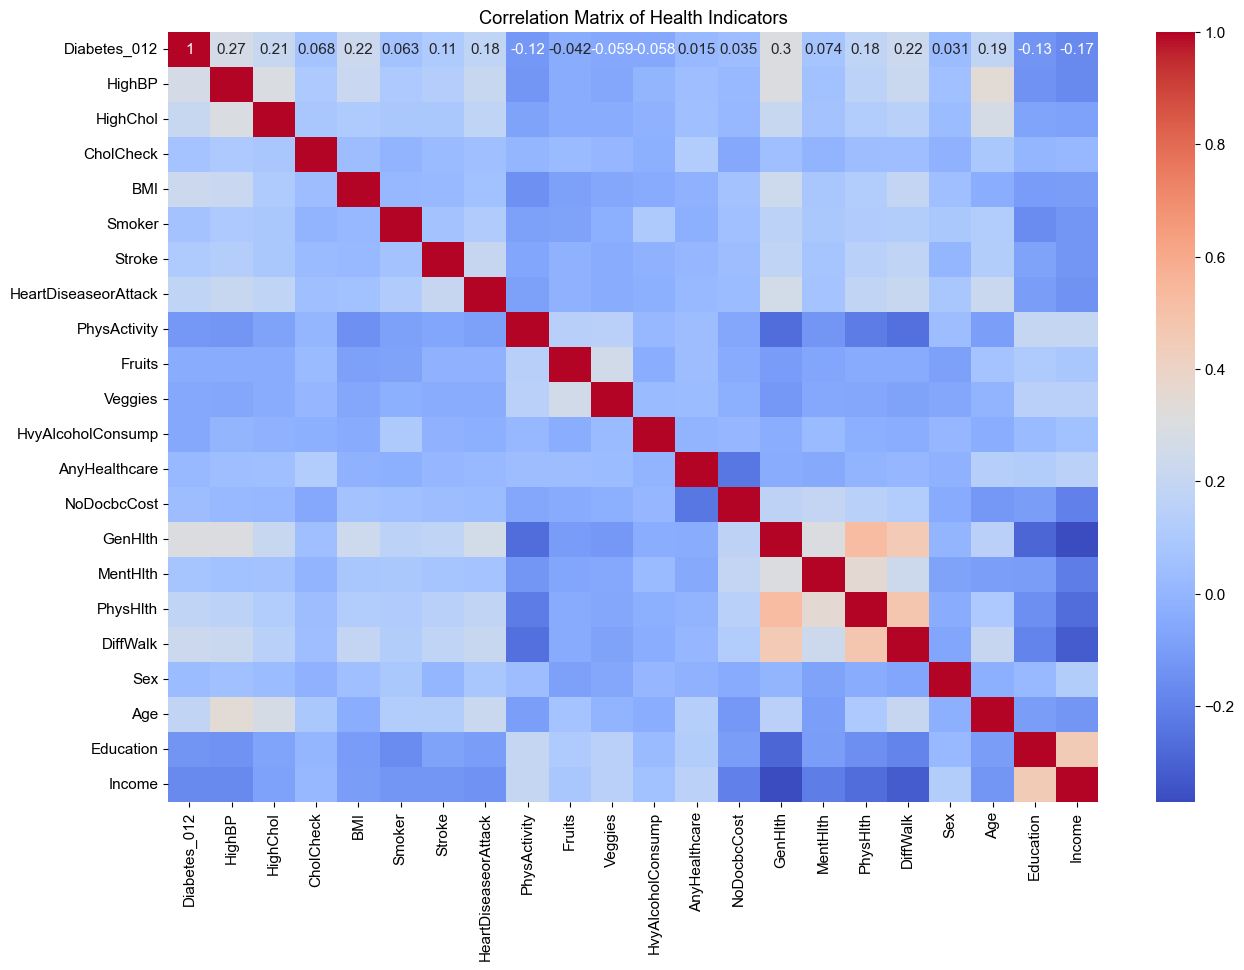

(        Diabetes_012         HighBP       HighChol      CholCheck  \
 count  253680.000000  253680.000000  253680.000000  253680.000000   
 mean        0.296921       0.429001       0.424121       0.962670   
 std         0.698160       0.494934       0.494210       0.189571   
 min         0.000000       0.000000       0.000000       0.000000   
 25%         0.000000       0.000000       0.000000       1.000000   
 50%         0.000000       0.000000       0.000000       1.000000   
 75%         0.000000       1.000000       1.000000       1.000000   
 max         2.000000       1.000000       1.000000       1.000000   
 
                  BMI         Smoker         Stroke  HeartDiseaseorAttack  \
 count  253680.000000  253680.000000  253680.000000         253680.000000   
 mean       28.382364       0.443169       0.040571              0.094186   
 std         6.608694       0.496761       0.197294              0.292087   
 min        12.000000       0.000000       0.000000         

In [3]:
import seaborn as sns

# Basic Statistical Summary of the Dataset
summary_stats = data.describe()

# Correlation Matrix
correlation_matrix = data.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Health Indicators')
plt.show()

summary_stats, correlation_matrix[['Diabetes_012']].sort_values(by='Diabetes_012', ascending=False)


In [4]:
# Load the new dataset for analysis of class balance
file_path_new = 'data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
data_new = pd.read_csv(file_path_new)

# Display the first few rows of the dataframe
data_new.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [5]:
# Filtering the 'No Diabetes' cases from both datasets
no_diabetes_original = data[data['Diabetes_012'] == 0]
no_diabetes_binary = data_new[data_new['Diabetes_binary'] == 0]

# Comparing the means of the two subsets
means_original = no_diabetes_original.mean()
means_binary = no_diabetes_binary.mean()

# Creating a dataframe for comparison
comparison_df = pd.DataFrame({'Original Dataset': means_original, 'Binary Dataset': means_binary})

comparison_df


,Original Dataset,Binary Dataset
Age,7.786559,7.789057
AnyHealthcare,0.949739,0.950150
BMI,27.742521,27.769960
CholCheck,0.957104,0.957336
Diabetes_012,0.000000,NaN
Diabetes_binary,NaN,0.000000
DiffWalk,0.132282,0.134244
Education,5.106629,5.096390
Fruits,0.643023,0.638149
GenHlth,2.372391,2.383183
